In [84]:
import os
import os
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import shutil
import glob
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.models import Model
import tensorflow as tf


In [85]:
original_path = '../input/v2-plant-seedlings-dataset/nonsegmentedv2' 

In [86]:
total = 0
for i in os.listdir(original_path):
  pa = os.path.join(original_path, i)
  for m in glob.glob(pa +'/*'):
    if m.split('/')[-2] == 'Cleavers':
      total += 1
print(f'Total images: {total}')

Total images: 335


In [87]:
concat_path = './all_files'
chk_fld = os.path.isdir(concat_path)

if not chk_fld:
  os.mkdir(concat_path)
  print(f'folder created Successfully: {concat_path}')

else:
  print('Folder already present')


folder created Successfully: ./all_files


In [88]:
#shutil.rmtree('./all_files')

In [89]:
total = 0
for i in os.listdir(original_path):
    pa = os.path.join(original_path, i)
    for m in glob.glob(pa +'/*'):
        new_name = str(m.split('/')[-2]) + '_' + str(m.split('/')[-1])
        path = os.path.join(concat_path, new_name)
        #print(m)
        im_dim = cv2.imread(m)
        cv2.imwrite(path, im_dim)
        #shutil.copyfile(m, path)
        total += 1
        #print(f'{m}: image uploaded to destination')
print(f'\n--------Total files uploaded: {total}')


--------Total files uploaded: 5539


In [91]:
os.listdir(original_path)

['Scentless Mayweed',
 'Common wheat',
 'Charlock',
 'Black-grass',
 'Sugar beet',
 'Loose Silky-bent',
 'Maize',
 'Cleavers',
 'Common Chickweed',
 'Fat Hen',
 'Small-flowered Cranesbill',
 'Shepherd’s Purse']

In [92]:
ls ={}
total_images = 0
for root, dirs, files in os.walk(original_path):
  if root.endswith('nonsegmentedv2'):
    pass
  else:
    if root not in ls:
      ls[root] = len(files)
      total_images += len(files)
      #print(len(files),'----',files)

for key,values in ls.items():
  trunc_class = key.split('/')[-1]
  print(f'{trunc_class}: {values}')
print(f'\nTotal Images:- {total_images}')

Scentless Mayweed: 607
Common wheat: 253
Charlock: 452
Black-grass: 309
Sugar beet: 463
Loose Silky-bent: 762
Maize: 257
Cleavers: 335
Common Chickweed: 713
Fat Hen: 538
Small-flowered Cranesbill: 576
Shepherd’s Purse: 274

Total Images:- 5539


In [93]:
all_file_path = "./all_files"

In [94]:
cols = ['file_path', 'target']
lst = []
for f_name in glob.glob(all_file_path + '/*'):
  name = f_name.split('/')[-1]
  class_nm = name.split('_')[0]
  lst.append([f_name,class_nm])

df = pd.DataFrame(lst, columns=cols)
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,file_path,target
0,./all_files/Cleavers_173.png,Cleavers
1,./all_files/Common Chickweed_56.png,Common Chickweed
2,./all_files/Loose Silky-bent_571.png,Loose Silky-bent
3,./all_files/Sugar beet_433.png,Sugar beet
4,./all_files/Black-grass_170.png,Black-grass
5,./all_files/Cleavers_237.png,Cleavers
6,./all_files/Charlock_308.png,Charlock
7,./all_files/Common Chickweed_31.png,Common Chickweed
8,./all_files/Charlock_351.png,Charlock
9,./all_files/Common Chickweed_119.png,Common Chickweed


In [95]:
df.shape

(5539, 2)

(347, 347, 3)


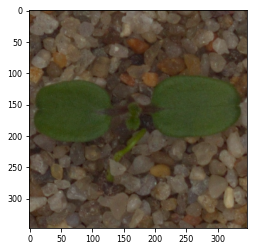

In [96]:
plant_img = imread(df['file_path'][0])
plt.imshow(plant_img)
print(plant_img.shape)

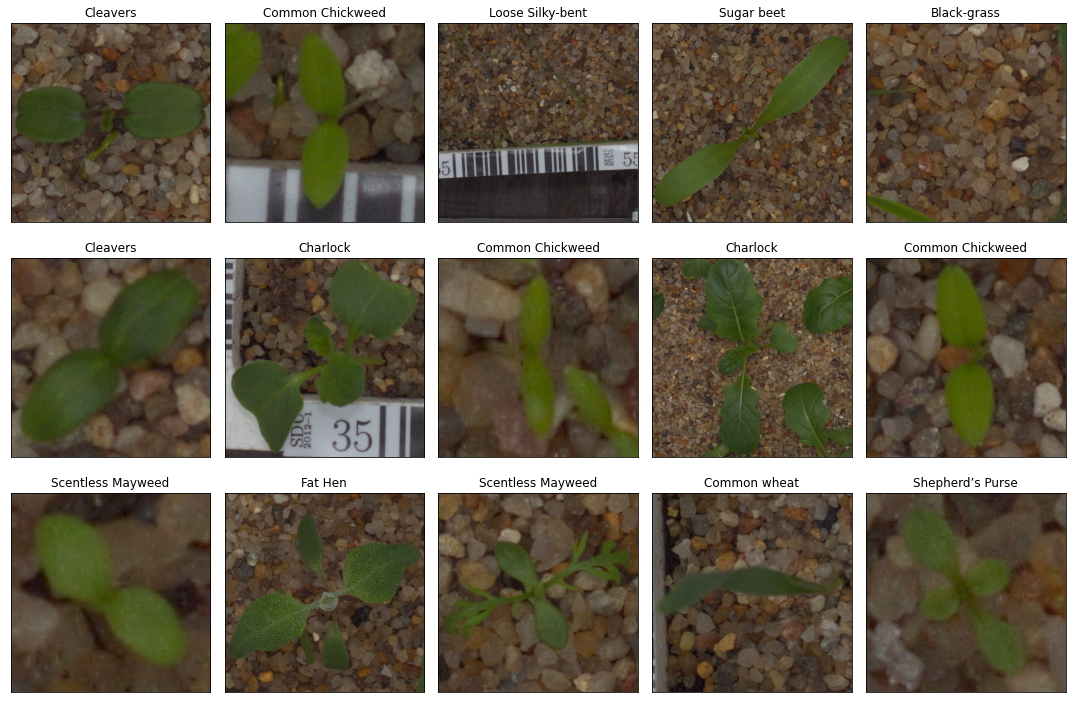

In [97]:
# Display some pictures of the dataset with their labels
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.file_path[i]))
    ax.set_title(df.target[i])

plt.tight_layout()
plt.show()

In [ ]:
# Balance the class distribution

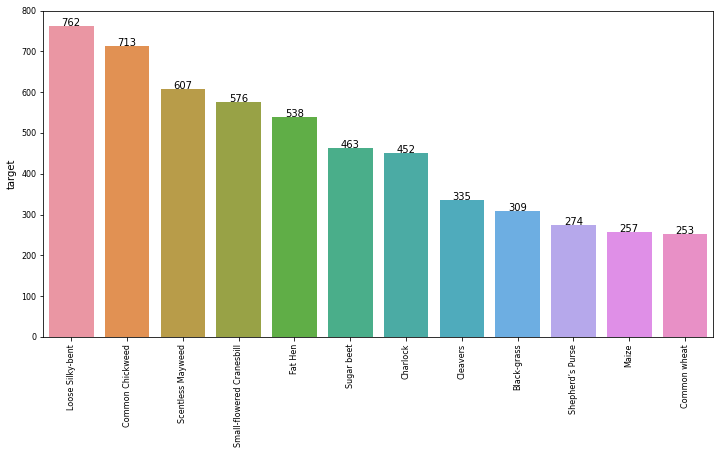

In [98]:
fig, ax1 = plt.subplots(figsize=(12,6))
graph = sns.barplot(x=df.target.value_counts().index, y=df.target.value_counts())
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df['target'].value_counts()[i],ha="center")
    i += 1
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels
#df.groupby('target').count()

In [ ]:
#plant_im = imread(im_df['FilePaths'][0])
#plt.imshow(plant_im)

In [ ]:
dim1 = []
dim2 = []

for im_filename in df['file_path']:
    
    img = imread(im_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [ ]:
sns.jointplot(dim1,dim2)

In [99]:
v2seed = os.listdir(original_path)
sample_size = 250

for index, cat in enumerate(v2seed):
  cat = str(cat.strip())
  
  if cat not in ['.ipynb_checkpoints']:
    sample_df = df.loc[df['target'] == cat].sample(n=sample_size,random_state=42)
    print(sample_df.head(1))

    if index == 0:
      final_sampled_df = sample_df

    else:
      final_sampled_df = pd.concat([final_sampled_df, sample_df]).reset_index(drop=True)

display(final_sampled_df.groupby('target').count())
  
final_sampled_df.head()

                                  file_path             target
5074  ./all_files/Scentless Mayweed_245.png  Scentless Mayweed
                             file_path        target
4537  ./all_files/Common wheat_185.png  Common wheat
                         file_path    target
3390  ./all_files/Charlock_261.png  Charlock
                            file_path       target
5301  ./all_files/Black-grass_121.png  Black-grass
                           file_path      target
2486  ./all_files/Sugar beet_215.png  Sugar beet
                                 file_path            target
1389  ./all_files/Loose Silky-bent_450.png  Loose Silky-bent
                     file_path target
3625  ./all_files/Maize_65.png  Maize
                        file_path    target
486  ./all_files/Cleavers_317.png  Cleavers
                                file_path            target
871  ./all_files/Common Chickweed_287.png  Common Chickweed
                       file_path   target
5089  ./all_files/Fat Hen_39.p

,file_path
target,
Black-grass,250
Charlock,250
Cleavers,250
Common Chickweed,250
Common wheat,250
Fat Hen,250
Loose Silky-bent,250
Maize,250
Scentless Mayweed,250


,file_path,target
0,./all_files/Scentless Mayweed_245.png,Scentless Mayweed
1,./all_files/Scentless Mayweed_503.png,Scentless Mayweed
2,./all_files/Scentless Mayweed_604.png,Scentless Mayweed
3,./all_files/Scentless Mayweed_27.png,Scentless Mayweed
4,./all_files/Scentless Mayweed_52.png,Scentless Mayweed


In [100]:
# train_test_split

# stratify=y creates a balanced validation set.
y = final_sampled_df['target']

df_train, df_val = train_test_split(final_sampled_df, test_size=0.10, random_state=42, stratify=y)

print(df_train.shape)
print(df_val.shape)

(2700, 2)
(300, 2)


In [101]:
def make_class_dir(original_path,data_dir,subfolder):
  for name in os.listdir(original_path):
    os.mkdir(os.path.join(data_dir,subfolder,name))
    print(f'{name} inside {subfolder} is created...')

In [102]:
data_dir = './data_dir'
chk_fld = os.path.isdir(data_dir)

if not chk_fld:
  os.mkdir(data_dir)
  print(f'created folder: {data_dir}\n')

  for subfolder in ['train_dir', 'val_dir']:
    os.mkdir(os.path.join(data_dir, subfolder))
    print(f'{subfolder} subdirectory created')
    make_class_dir(original_path, data_dir, subfolder)
    
else:
  folder_nm = data_dir.split('/')[-1]
  print(f'{folder_nm} folder already exists')

created folder: ./data_dir

train_dir subdirectory created
Scentless Mayweed inside train_dir is created...
Common wheat inside train_dir is created...
Charlock inside train_dir is created...
Black-grass inside train_dir is created...
Sugar beet inside train_dir is created...
Loose Silky-bent inside train_dir is created...
Maize inside train_dir is created...
Cleavers inside train_dir is created...
Common Chickweed inside train_dir is created...
Fat Hen inside train_dir is created...
Small-flowered Cranesbill inside train_dir is created...
Shepherd’s Purse inside train_dir is created...
val_dir subdirectory created
Scentless Mayweed inside val_dir is created...
Common wheat inside val_dir is created...
Charlock inside val_dir is created...
Black-grass inside val_dir is created...
Sugar beet inside val_dir is created...
Loose Silky-bent inside val_dir is created...
Maize inside val_dir is created...
Cleavers inside val_dir is created...
Common Chickweed inside val_dir is created...
Fat 

In [103]:
final_sampled_df['file_path'].values[0]

'./all_files/Scentless Mayweed_245.png'

In [104]:
# The images will all be resized to this size.
img_size = 96

for root, dir, file in os.walk(data_dir):
  base_cond = root.split('/')[-2]
  if base_cond == 'train_dir':
    filter = root.split('/')[-1]
    if filter not in ['.ipynb_checkpoints']:
      train = df_train['file_path'][df_train['file_path'].astype(str).str.contains(filter)].values

      for i in train:
        #resize the image and save it at the new location
        image = cv2.imread(i)
        image = cv2.resize(image, (img_size, img_size))
      
        # save the image at the destination
        tr_f_nm = i.split('_')[-1]
        tr_path = os.path.join(root,tr_f_nm)
        #print(tr_path)

        cv2.imwrite(tr_path, image)
        #print(f'Base Folder: train_dir; Sub Floder:{filter}; Uploaded File: {tr_f_nm}')

In [105]:
pth = './data_dir/train_dir'
total = 0
for i in os.listdir(pth):
  x = os.listdir(os.path.join(pth,i))
  print(f'{i}:- {len(x)}\n')
  total += len(x)
print(f'Total images: {total}')

Cleavers:- 225

Black-grass:- 225

Shepherd’s Purse:- 225

Small-flowered Cranesbill:- 225

Loose Silky-bent:- 225

Fat Hen:- 225

Charlock:- 225

Scentless Mayweed:- 225

Sugar beet:- 225

Common wheat:- 225

Common Chickweed:- 225

Maize:- 225

Total images: 2700


In [106]:
# For testing folder 

for root, dir, file in os.walk(data_dir):
  base_cond = root.split('/')[-2]
  if base_cond == 'val_dir':
    filter = root.split('/')[-1]
    if filter not in ['.ipynb_checkpoints']:
      val = df_val['file_path'][df_val['file_path'].astype(str).str.contains(filter)].values
      
      for i in val:
        #resize the image and save it at the new location
        image = cv2.imread(i)
        image = cv2.resize(image, (img_size, img_size))
        
        # save the image at the destination
        val_f_nm = i.split('_')[-1]
        val_path = os.path.join(root,val_f_nm)
        #print(val_path)
        cv2.imwrite(val_path, image)
        #print(f'Base Folder: train_dir; Sub Floder:{filter}; Uploaded File: {val_f_nm}')


In [107]:
pth = './data_dir/val_dir'
total = 0
for i in os.listdir(pth):
  x = os.listdir(os.path.join(pth,i))
  print(f'{i}:- {len(x)}\n')
  total += len(x)
print(f'Total images: {total}')

Cleavers:- 25

Black-grass:- 25

Shepherd’s Purse:- 25

Small-flowered Cranesbill:- 25

Loose Silky-bent:- 25

Fat Hen:- 25

Charlock:- 25

Scentless Mayweed:- 25

Sugar beet:- 25

Common wheat:- 25

Common Chickweed:- 25

Maize:- 25

Total images: 300


In [108]:
cache_directory = './cache'
if not os.path.exists(cache_directory):
  os.makedirs(cache_directory)

  #df_train
  path = os.path.join(cache_directory,'file_df_train.pkl')
  df_train.to_pickle(path) 

  #df_val
  path = os.path.join(cache_directory,'file_df_val.pkl')
  df_val.to_pickle(path)

else:
  print('Directory already exists')

In [109]:
for i in glob.glob('./cache'+'/*'):

  if 'train' in i.split('/')[-1]:
    df_train = pd.read_pickle(i)
  else:
    df_val = pd.read_pickle(i)

In [110]:
  df_val.head()

,file_path,target
667,./all_files/Charlock_361.png,Charlock
2239,./all_files/Common Chickweed_277.png,Common Chickweed
2411,./all_files/Fat Hen_150.png,Fat Hen
13,./all_files/Scentless Mayweed_91.png,Scentless Mayweed
2539,./all_files/Small-flowered Cranesbill_510.png,Small-flowered Cranesbill


In [111]:
train_path = './data_dir/train_dir'
valid_path = './data_dir/val_dir'

"""
batch_sz = 16

train_steps = np.ceil(len(df_train)/batch_sz)
val_steps = np.ceil(len(df_val)/batch_sz)
print(f'train_steps: {train_steps}\nval_steps: {val_steps}')
"""

num_train_samples = len(df_train)
num_val_samples = len(df_val)
#train_batch_size = 10
#val_batch_size = 10

train_batch_size = 10
val_batch_size = 10


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)
print(f'train_steps: {train_steps}\nval_steps: {val_steps}')

train_steps: 270.0
val_steps: 30.0


In [113]:
epoch     = 35
batch_size   = 10
width        = 96
height       = 96
datagen = ImageDataGenerator(rotation_range=30, # rotate the image 20 degrees
                               width_shift_range=0.2, # Shift the pic width by a max of 5%
                               height_shift_range=0.2, # Shift the pic height by a max of 5%
                               shear_range=0.15, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.15, # Zoom in by 10% max
                               horizontal_flip=True, 
                               fill_mode="nearest", # Fill in missing pixels with the nearest filled value
                              )

In [114]:
train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(width, height),
                                        batch_size=batch_size,
                                        class_mode='categorical',
                                        color_mode='rgb',)

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(width, height),
                                        batch_size=batch_size,
                                        class_mode='categorical',
                                        color_mode='rgb',)

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(width, height),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False,
                                       color_mode='rgb',)

Found 2700 images belonging to 12 classes.
Found 300 images belonging to 12 classes.
Found 300 images belonging to 12 classes.


In [115]:
m_input =  tf.keras.layers.Input(shape=(width, height, 3), name='image_input')
m_pretrained = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet')(m_input)
m_dense1 = Flatten()(m_pretrained)
m_dense2 = Dense(128, activation='relu')(m_dense1)
#output
output = Dense(12, activation="softmax")(m_dense2)

#Final Model
model = Model(m_input, output)

optimizer = tf.keras.optimizers.Adam(lr=0.00004, beta_1=0.9, beta_2=0.999)
# compiling the model
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 96, 96, 3)]       0         
_________________________________________________________________
inception_resnet_v2 (Functio (None, None, None, 1536)  54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               196736    
_________________________________________________________________
dense_3 (Dense)              (None, 12)                1548      
Total params: 54,535,020
Trainable params: 54,474,476
Non-trainable params: 60,544
_________________________________________________________________


In [116]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                             save_best_only=True)


reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=3, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

In [117]:
results = model.fit(
    train_gen,
    epochs=epoch,
    steps_per_epoch=train_steps,
    validation_data= val_gen,
    validation_steps=val_steps,
    callbacks= callbacks_list
)

Epoch 1/35
270/270 [==============================] - 67s 169ms/step - loss: 2.3954 - accuracy: 0.1757 - val_loss: 4.2932 - val_accuracy: 0.3933
Epoch 2/35
270/270 [==============================] - 40s 150ms/step - loss: 1.7264 - accuracy: 0.4340 - val_loss: 200.0355 - val_accuracy: 0.5233
Epoch 3/35
270/270 [==============================] - 41s 151ms/step - loss: 1.3262 - accuracy: 0.5641 - val_loss: 17970.8145 - val_accuracy: 0.6500
Epoch 4/35
270/270 [==============================] - 40s 149ms/step - loss: 1.0832 - accuracy: 0.6411 - val_loss: 190249.9219 - val_accuracy: 0.6933
Epoch 5/35
270/270 [==============================] - 41s 151ms/step - loss: 0.8819 - accuracy: 0.7092 - val_loss: 93746.7344 - val_accuracy: 0.7133
Epoch 6/35
270/270 [==============================] - 40s 148ms/step - loss: 0.7886 - accuracy: 0.7238 - val_loss: 71496.8828 - val_accuracy: 0.7667
Epoch 7/35
270/270 [==============================] - 40s 149ms/step - loss: 0.7145 - accuracy: 0.7622 - val_lo

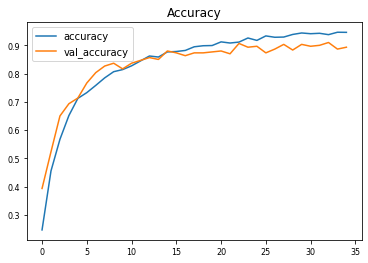

In [118]:
# get the metric names so we can use evaulate_generator
pd.DataFrame(results.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

In [124]:
res = model.evaluate_generator(test_gen)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [137]:
print('Test Loss: {:.4f}'.format(res[0]))
print('Accuracy on the test set: {:.2f}%'.format(res[1] * 100))

Test Loss: 1814.2910
Accuracy on the test set: 89.33%


In [219]:
# Predict the label of the test_images
predictions = model.predict_generator(test_gen, steps=len(df_val), verbose=1)

  3/300 [..............................] - ETA: 11s

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


300/300 [==============================] - 11s 37ms/step


In [200]:
pred = model.predict(test_gen, steps=test_gen.samples)

In [220]:
class_list = []
species_list = ["Black-grass", "Charlock", "Cleavers", "Common Chickweed", "Common wheat", "Fat Hen",
                "Loose Silky-bent", "Maize", "Scentless Mayweed", "Shepherds Purse", "Small-flowered Cranesbill",
                "Sugar beet"]
for i in range(0, predictions.shape[0]):
    y_class = predictions[i, :].argmax(axis=-1)
    class_list += [species_list[y_class]]

In [227]:
sub = pd.DataFrame()
sub['file'] = test_gen.filenames
sub['species'] = class_list
sub.head()

,file,species
0,Black-grass/1.png,Black-grass
1,Black-grass/116.png,Black-grass
2,Black-grass/144.png,Black-grass
3,Black-grass/149.png,Black-grass
4,Black-grass/18.png,Loose Silky-bent


In [257]:
# Display some pictures of the dataset with their labels and the predictions



def full_file_paths(path, ls):
    for root, directory, files in os.walk(path):
        if root.split('/')[-1] not in ['val_dir']:
            for i in files:
                full_path = os.path.join(root,i)
                ls.append(str(full_path))
    return ls
            

In [258]:
path = './data_dir/val_dir'
f_path = full_file_paths(path,ls = [])

In [269]:
total = 0
for i in range(0, len(sub)):
    total += i
print(total)

44850


In [175]:
test_gen.class_indices

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherd’s Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

In [177]:
test_gen.classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  9

In [158]:
# Put the predictions into a dataframe.
# The columns need to be ordered to match the output of the previous cell

class_dict = train_gen.class_indices

# Get a list of the dict keys.
cols = class_dict.keys()

df_preds = pd.DataFrame(predictions, columns=cols)

df_preds.head()

,Black-grass,Charlock,Cleavers,Common Chickweed,Common wheat,Fat Hen,Loose Silky-bent,Maize,Scentless Mayweed,Shepherd’s Purse,Small-flowered Cranesbill,Sugar beet
0,0.812179,1.435640e-07,0.000001,7.482001e-05,0.000420,0.000211,0.186799,6.151242e-06,0.000004,3.972520e-05,0.000006,0.000258
1,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000
2,0.928827,7.742983e-06,0.000040,2.434077e-05,0.002905,0.000090,0.067180,1.356554e-04,0.000040,1.727308e-05,0.000016,0.000717
3,0.999016,5.323409e-07,0.000005,8.129795e-07,0.000795,0.000048,0.000122,3.986296e-07,0.000008,1.402826e-06,0.000001,0.000001
4,0.963291,6.585582e-08,0.000002,8.907953e-05,0.002091,0.002031,0.032340,2.402030e-06,0.000047,3.085919e-07,0.000067,0.000039


In [162]:
# Get the labels of the test images.
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    # set the size of the figure here
    plt.figure(figsize=(15,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=80) # set x-axis text angle here
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [163]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

Confusion matrix, without normalization
[[21  0  0  0  0  0  3  0  0  0  0  1]
 [ 0 24  0  0  0  0  0  0  0  0  1  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  1  0  0  0  0  0  0]
 [ 2  0  0  0 20  0  0  1  0  0  0  2]
 [ 1  0  0  0  0 24  0  0  0  0  0  0]
 [ 7  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  1  2  0  0 22  0  0  0  0]
 [ 0  0  0  4  0  0  0  0 21  0  0  0]
 [ 0  0  0  0  0  0  0  0  1 24  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0  3  0  0  0 22]]


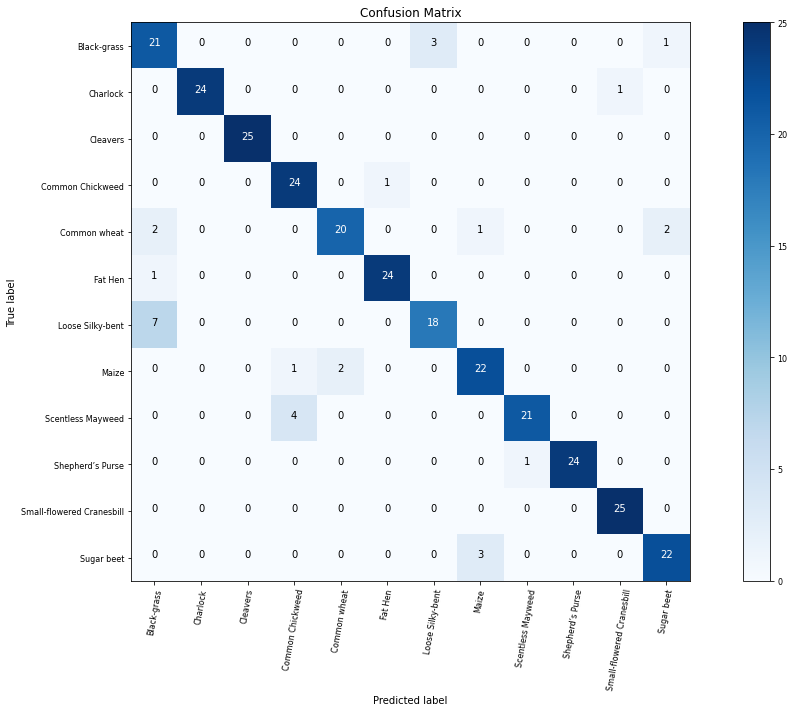

In [164]:
# Define the labels of the class indices. These need to match the 
# order shown above.
cm_plot_labels = cols

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [165]:
from sklearn.metrics import classification_report

# Generate a classification report

# Get the true labels
y_true = test_gen.classes

# For this to work we need y_pred as binary labels not as probabilities
y_pred_binary = predictions.argmax(axis=1)

report = classification_report(y_true, y_pred_binary, target_names=cm_plot_labels)

print(report)

                           precision    recall  f1-score   support

              Black-grass       0.68      0.84      0.75        25
                 Charlock       1.00      0.96      0.98        25
                 Cleavers       1.00      1.00      1.00        25
         Common Chickweed       0.83      0.96      0.89        25
             Common wheat       0.91      0.80      0.85        25
                  Fat Hen       0.96      0.96      0.96        25
         Loose Silky-bent       0.86      0.72      0.78        25
                    Maize       0.85      0.88      0.86        25
        Scentless Mayweed       0.95      0.84      0.89        25
         Shepherd’s Purse       1.00      0.96      0.98        25
Small-flowered Cranesbill       0.96      1.00      0.98        25
               Sugar beet       0.88      0.88      0.88        25

                 accuracy                           0.90       300
                macro avg       0.91      0.90      0.90    

In [187]:
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

The first 5 predictions: ['Loose Silky-bent', 'Common wheat', 'Black-grass', 'Black-grass', 'Black-grass']


In [172]:
pred

array([ 6,  7,  0,  0,  0,  6,  0,  0,  0,  0,  0,  6,  0,  6,  0,  6,  0,
        7,  0,  0,  0,  4,  0,  6,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        4,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  9,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  9,  3,  3,  3, 10,  3,  3,  3,  3,  4,  7,
        4,  4,  4,  4,  6,  4,  4,  4,  7,  4, 11,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  6,  4,  5,  5,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  0,  5,  5,  5,  6,  6,  0,
        0, 11,  6,  6,  6,  0,  6,  0,  0,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  0,  0,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  4,  0,  7,  7,  7,  8,  8,  9,  8,
        8,  9,  8,  8,  8,  8,  9,  8,  8,  3,  3,  8,  8,  8,  8,  8,  8,
        0,  8,  8,  8,  9

In [168]:
df_val

,file_path,target
667,./all_files/Charlock_361.png,Charlock
2239,./all_files/Common Chickweed_277.png,Common Chickweed
2411,./all_files/Fat Hen_150.png,Fat Hen
13,./all_files/Scentless Mayweed_91.png,Scentless Mayweed
2539,./all_files/Small-flowered Cranesbill_510.png,Small-flowered Cranesbill
...,...,...
1143,./all_files/Sugar beet_295.png,Sugar beet
952,./all_files/Black-grass_49-2.png,Black-grass
1708,./all_files/Maize_155.png,Maize
1486,./all_files/Loose Silky-bent_695.png,Loose Silky-bent


## Loading images with a generator 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet_v2 import preprocess_input

In [ ]:
def create_gen():
    # Load the Images with a generator and Data Augmentation
    train_generator = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        validation_split=0.1
    )

    test_generator = ImageDataGenerator(
        preprocessing_function=preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=im_df,
        x_col='FilePaths',
        y_col='Labels',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='training',
        rotation_range=30, # Uncomment to use data augmentation
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=im_df,
        x_col='FilePaths',
        y_col='Labels',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation',
        rotation_range=30, # Uncomment to use data augmentation
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=im_df,
        x_col='FilePaths',
        y_col='Labels',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )
    
    return train_generator,test_generator,train_images,val_images,test_images

In [ ]:
# Load the pretained model
import tensorflow as tf
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [ ]:
# Separate in train and test data
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(im_df, train_size=0.9, shuffle=True, random_state=1)

In [ ]:
# Create the generators
train_generator,test_generator,train_images,val_images,test_images = create_gen()

In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(12, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

# Visualize the results

In [ ]:
results = model.evaluate(test_images, verbose=0)

In [ ]:
def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))

In [ ]:
printmd(" ## Test Loss: {:.5f}".format(results[0]))
printmd("## Accuracy on the test set: {:.2f}%".format(results[1] * 100))

In [ ]:
os.listdir('/kaggle/input/v2-plant-seedlings-dataset')